In [1]:
# Set global style
from IPython.core.display import display, HTML
style = """
<style>
  .container { 
    width:100% !important;
    margin: 0px;
    padding: 0px;
  }
  div#notebook {
    font-size: 14px;
    line-height: 20px;
    overflow-y: hidden;
    overflow-x: auto;
    width: 100%;
    outline: none;
    /*box-sizing: border-box;
    -moz-box-sizing: border-box;
    -webkit-box-sizing: border-box; */
    min-height: 100%;
    padding: 0px;
    margin: 0px;
  }
  .prompt_container {
    width: auto;
    padding-left: 0px;
    margin-left: 0px;
    display: none;
    border: none;
  }
  .prompt {
    width: 0px;
    border: solid;
    display: none;
  }
  .input_prompt {
    width: 0px;
    display: none;
  }
  .run_this_cell {
    margin: 0px;
    padding: 0px;
    display: visible;
  }
  .output_wrapper {
    display: none;
  }
  .cell, #notebook, #notebook_container {
    margin: 0px;
    padding: 0px;
  }
</style>"""
display(HTML(style))

In [2]:
%%javascript
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('alt-h', function(event) {
    var sc = document.getElementsByClassName('selected')[0];
    sc.setAttribute('style', 'display:flex;flex-flow:row;width:100%;');
    sc.style.flexFlow = 'row';
    sc.children[0].style.maxWidth = '50%';
    sc.children[1].style.maxWidth = '50%';
    sc.children[0].style.width = '50%';
    sc.children[1].style.width = '50%';
})

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('alt-v', function(event) {
    var sc = document.getElementsByClassName('selected')[0];
    sc.setAttribute('style', 'display:flex;flex-flow:column;width:100%;');
    sc.style.flexFlow = 'column';
    sc.children[0].style.maxWidth = '100%';
    sc.children[1].style.maxWidth = '100%';
//     sc.children[0].style.width = '100%';
//     sc.children[1].style.width = '100%';
    sc.children[0].style.width = 'auto';
    sc.children[1].style.width = 'auto';
})

<IPython.core.display.Javascript object>

<h1>Building Graphical User Interfaces in jupyter notebooks</h1>
<h2>ipywidgets</h2>
<p>Widgets are the basic elements of graphical user interfaces. Widgets are elements like sliders, text fields, buttons or 3D elements. ipywidgets is a python module that provides a set of basic GUI elements.</p>
<a href='https://ipywidgets.readthedocs.io/en/latest/'>ipywidgets documentation</a>

In [3]:
from ipywidgets import *

# A slider
slider = IntSlider()

# A text field
textarea = Textarea()

# A Button
button = Button(description='Click Me!', icon='check', button_style='success', tooltip='I am doing nothing but you can click me!')

# A Tab widget
tab = Tab()

# Put them together in a list
widgetlist = [slider, textarea, button]

# A VBox widget to align them
tab.children = widgetlist

tab.set_title(0, 'IntSlider')
tab.set_title(1, 'TextArea')
tab.set_title(2, 'Button')

tab

VGFiKGNoaWxkcmVuPShJbnRTbGlkZXIodmFsdWU9MCksIFRleHRhcmVhKHZhbHVlPXUnJyksIEJ1dHRvbihidXR0b25fc3R5bGU9dSdzdWNjZXNzJywgZGVzY3JpcHRpb249dSdDbGljayBNZSHigKY=


<h3>Linking widgets with jslinks</h3>
<p>To make widgets actually do something they need to be linked in one way or the other. One posibility to do this is to link them with the ipywidgets.jslink() function.</p>

In [4]:
slider2 = IntSlider(description='IntSlider:', value=30, orientation='horizontal', style={'handle_color':'orange'})
progbar = IntProgress(description='Progr.Bar:', value=50, bar_style='warning', orientation='horizontal')

HBox([slider2, progbar])

SEJveChjaGlsZHJlbj0oSW50U2xpZGVyKHZhbHVlPTMwLCBkZXNjcmlwdGlvbj11J0ludFNsaWRlcjonLCBzdHlsZT1TbGlkZXJTdHlsZShoYW5kbGVfY29sb3I9J29yYW5nZScpKSwgSW50UHLigKY=


In [5]:
l = widgets.jslink((slider2, 'value'), (progbar, 'value'))

<h3>Connecting widgets with ipywidgets.interactive()</h3>
<p>Another way is to connect them with the ipywidgets.interactive() function, wich is called every time the value of the first widget is changing</p>

In [6]:
# Import numpy and create 100 random values
import numpy as np
randlist = np.random.randn(100)

# Creating a SelectBox
selectbox = widgets.SelectMultiple(options=randlist, rows=15)

# Defining the function to be called when a value changes
def f(val):
    selectbox.options = sorted([i for i in randlist if val[0] <= i <= val[1]])

# Connecting the widgets with the ipywidgets.interactive function
w = widgets.interactive(f, val=widgets.FloatRangeSlider(description='Value Range:', value=(0, 1), min=0, max=1, step=0.01))


# Display everything
display(selectbox, w)

U2VsZWN0TXVsdGlwbGUob3B0aW9ucz0oMC4wOTY2NDkzMjc1MTExMjA3NCwgMS41NzA3ODEyMDMzMDc4MDg4LCAtMC42MzcwMDYzNjE2MzIzOTAyLCAtMS43NTYxMzY2MTAzNDM0MzU1LCAxLjDigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0UmFuZ2VTbGlkZXIodmFsdWU9KDAuMCwgMS4wKSwgZGVzY3JpcHRpb249dSdWYWx1ZSBSYW5nZTonLCBtYXg9MS4wLCBzdGVwPTAuMDEpLCBPdXTigKY=


<h3>The Button.on_click method</h3>

In [7]:
import datetime

def printdate(b):
    print('Clicked at: ' + str(datetime.datetime.now()))

btn = Button(description='Print Timestamp!', icon='print')

btn.on_click(printdate)
btn

Button(description=u'Print Timestamp!', icon=u'print', style=ButtonStyle())

In [8]:
import random
button_styles = ['info', 'success', 'warning', 'danger', 'primary']

# Define a createbutton function
def createbutton(b):
    btn = Button(description=buttonstyle.value.title(), icon=buttonstyle.value, button_style=buttonstyle.value)
    btn.on_click(createbutton)
    with out:
        display(btn)

# Creating our widgets
out = Output()
buttonstyle = Select(options=button_styles)
btn = Button(description='Add a button', icon='plus')
btn.on_click(createbutton)

# Display the widgets
with out:
#     display(buttonstyle)
    display(btn)
HBox([buttonstyle, out])

<h3>Basic widget types</h3>
<p>ipywidgets provides a bunch of widgets for all basic data types like Strings, Integers, Floats, Dates, Colors, Selections ect.<br>For a complete list of widgets see <a href='https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html'>ipywidgets widget list</a> or the second Tab below.</p>

In [9]:
from IPython.display import IFrame

def labelme(w):
    l = Label()
    jslink((w, 'value'), (l, 'value'))
    return HBox([w, l])

widgetlist2 = []

widgetlist2.append(labelme(Text()))
widgetlist2.append(labelme(Textarea()))
widgetlist2.append(IntSlider(
    description='Integer:'
))
widgetlist2.append(FloatSlider(
    description='Float:',
    step=0.01
))
widgetlist2.append(FloatText(
    value=3.1415,
    description='Float Value:'
))
widgetlist2.append(Checkbox(
    value=False,
    description='Check Me'
))
widgetlist2.append(Dropdown(
    options=['Ja', 'Nein', 'Vielleicht', 'Ich mag Toastbrot!'],
    value='Vielleicht',
    description='Dropdown:'
))
widgetlist2.append(SelectMultiple(
    options=['Python', 'JavaScript', 'Ruby'],
    value=[],
    description='Language:',
    disabled=False
))
datepicker = DatePicker(
    description='Select a date:'
)

widgetlist2.append(labelme(datepicker))
colorpicker = ColorPicker(
    concise=False,
    description='Color:',
    value='orange'
)
colorpicker2 = ColorPicker(
    concise=True,
    description='',
    value='orange'
)
jslink((colorpicker, 'value'), (colorpicker2, 'value'))
widgetlist2.append(HBox([colorpicker, Label(layout={'width':'50%'}), colorpicker2]))
accordeon = Accordion()
accordeon.children = widgetlist2
titlelist = ['TextInput', 'TextArea', 'IntSlider', 'FloatSlider', 'FloatText', 'Checkbox', 'DropDown', 'MultiSelect', 'Datepicker', 'Colorpicker']
for i in range(len(titlelist)):
    accordeon.set_title(i, titlelist[i])

widgetlistoutput = Output()
with widgetlistoutput:
    display(IFrame('https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html', width='100%', height='500px'))

widgetlisttab = Tab()
widgetlisttab.children = [accordeon, widgetlistoutput]
widgetlisttab.set_title(0, 'WidgetList Accordion')
widgetlisttab.set_title(1, 'ipywidgets Documentation')
widgetlisttab

VGFiKGNoaWxkcmVuPShBY2NvcmRpb24oY2hpbGRyZW49KEhCb3goY2hpbGRyZW49KFRleHQodmFsdWU9dScnKSwgTGFiZWwodmFsdWU9dScnKSkpLCBIQm94KGNoaWxkcmVuPShUZXh0YXJlYSjigKY=


<h2>Layouts</h2>

<h3>Simple Layouts with HBox and VBox</h3>

In [10]:
# Creating some Buttons
buttons = [Button(description='Button ' + str(i), button_style=button_styles[i], layout={'width':'100%', 'height':'95%'}) for i in range(5)]

# Defining a Layout
boxlayout = Layout(border='solid', padding='5px', width='100%', height='100%')

# Defining a Tab widget
layouttabs = Tab(layout={'height':'250px'})
layoutchildren = [
#====================================================    
    HBox(
         buttons, layout=boxlayout
        ),
    VBox(
          buttons, layout=boxlayout
        ),
    HBox([
          VBox(
              buttons, layout=boxlayout
          ),
          VBox(
              buttons[::-1], layout=boxlayout
          )
         ])
#====================================================
]

layouttabs.children = layoutchildren
layouttabs.set_title(0, 'HBox')
layouttabs.set_title(1, 'VBox')
layouttabs.set_title(2, 'Vbox in Hbox')
layouttabs

VGFiKGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShCdXR0b24oYnV0dG9uX3N0eWxlPXUnaW5mbycsIGRlc2NyaXB0aW9uPXUnQnV0dG9uIDAnLCBsYXlvdXQ9TGF5b3V0KGhlaWdodD11Jzk1JSfigKY=


<h3>More complex Layouts using ipywidgets.AppLayout() and ipywidgets.GridspecLayout()</h3>
<p>Example partly copied from <a href='https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html'>ipywidgets documentation "Using Layout Templates"</a></p>

In [11]:
# Partly "stolen" from the ipywidgets documentation at https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html
layouttitles = ['AppLayout 1', 'AppLayout 2', 'TwoByTwoLayout', 'GridLayout 1', 'GridLayout 2', 'Layout Documentation']

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

header_button = create_expanded_button('Header', 'success')
left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')

layouts = [
AppLayout(header=header_button,
          left_sidebar=left_button,
          center=center_button,
          right_sidebar=right_button,
          footer=footer_button,
          width='100%', height='100%'),
AppLayout(header=header_button,
          left_sidebar=None,
          center=center_button,
          right_sidebar=right_button,
          footer=footer_button,
          width='100%', height='100%'),
TwoByTwoLayout(top_left=create_expanded_button('One', 'success'),
              top_right=create_expanded_button('Two', 'info'),
              bottom_left=create_expanded_button('Three', 'warning'),
              bottom_right=create_expanded_button('Four', 'danger'),
              width='100%', height='100%')
]

# Defining Grid Layouts
grid1 = GridspecLayout(4, 3, height='300px')
grid1[:3, 1:] = create_expanded_button('One', 'success')
grid1[:, 0] = create_expanded_button('Two', 'info')
grid1[3, 1] = create_expanded_button('Three', 'warning')
grid1[3, 2] = create_expanded_button('Four', 'danger')
layouts.append(grid1)

grid2 = GridspecLayout(4, 3, height='300px')
grid2[0, 0] = create_expanded_button('One', 'success')
grid2[1, 0] = create_expanded_button('Two', 'info')
grid2[2, 0] = create_expanded_button('Three', 'warning')
grid2[3, 0] = create_expanded_button('Four', 'danger')
grid2[:, 1:] = create_expanded_button('Five', 'primary')
layouts.append(grid2)
layoutoutput = Output()
with layoutoutput:
    display(IFrame('https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html', width='100%', height='290px'))
layouts.append(layoutoutput)

# Defining the Tab widget
layouttabs2 = Tab(layout={'height':'370px'})
layouttabs2.children = layouts
for i in range(len(layouttitles)):
    layouttabs2.set_title(i, layouttitles[i])
layouttabs2

VGFiKGNoaWxkcmVuPShBcHBMYXlvdXQoY2hpbGRyZW49KEJ1dHRvbihidXR0b25fc3R5bGU9dSdpbmZvJywgZGVzY3JpcHRpb249dSdSaWdodCcsIGxheW91dD1MYXlvdXQoZ3JpZF9hcmVhPXXigKY=


<h2>qgrid to make panda.DataFrame's interactive</h2>
<p>To replace the usual visualisation of pandas.Dataframe's by an interactive one qgrid provides a widgets that uses the javascript library slickgrid</p>


In [46]:
import pandas as pd
import qgrid

# df = pd.read_csv('plz_einwohner.csv')
df = pd.read_csv('grunfeld.csv')
grid = qgrid.show_grid(show_toolbar=True, data_frame=df)
grid

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


<h2>bqplot to create interactive Charts</h2>
<p>bqplot is a library that provides "Chart Widgets". In contrast to other charting libraries as matplotlib the properties of the charts can be changed after initialisation of the chart.<br>
    <ul>
    <li><a href="https://bqplot.readthedocs.io/en/latest/">Documentation</a></li>
    <li><a href="https://github.com/bloomberg/bqplot/tree/master">Github</a></li>
    <li><a href="https://github.com/bloomberg/bqplot/tree/master/examples">Examples</a></li>
    </ul>
</p>

In [14]:
# Creating a Output widget for displaying the output somewhere else
pieoutput = Output(layout=Layout(height='400px', width='100%'))
pieoutput

Output(layout=Layout(height=u'400px', width=u'100%'))

In [15]:
from bqplot import *

# Wir erzeugen uns ein paar Zufallsdaten
data = np.random.rand(10)

# Wir machen uns ein Pie Chart...
pie = Pie(sizes=data,
          display_labels='outside',
          labels=list('ABCDEFGHIJKLM'))

# ... fuegen es in eine Figur ein...
fig = Figure(marks=[pie],
             animation_duration=1000,
             layout={'width':'100%'})

# und zeigen es an
pieoutput.clear_output()
with pieoutput:
    display(fig)

<p>The created pie chart has a 'sort' attribut. Executing pie.sort returns the value of the actual state of the pie.chart (equivalent to a getter function)</p>

In [16]:
pie.sort

False

<p>Beside the possibility to get the actual value of the sort property it is also possible to set a value by assining a value to it (as with a setter function).</p> 

In [17]:
pie.sort = True

<p>By combining the get request of the property with setting the property it is easy to toggle the value.</p>

In [18]:
if pie.sort:
    pie.sort = False
else:
    pie.sort = True

<h3>Connecting bqplot and ipywidgets</h3> 

In [20]:
import string

# Wir erzeugen zwei leere dictionaries
controls, jlinks = dict(), dict()

pie = Pie(sizes=data,
          display_labels='outside',
          labels=list(string.ascii_uppercase))
fig = Figure(marks=[pie],
             animation_duration=1000,
             layout={'width':'70%'})

# Wir basten uns eine Checkbox mit der Beschreibung "Sort"
controls['sort'] = Checkbox(description='Sort', value=pie.sort, layout={'overflow':'hidden'})

# Wir verlinken den Wert dieser Checkbox mit dem tatsaechlichem Wert des Pie Charts 
# !!!Dies ist der wichtige Punkt der die eigentliche Interaktivitaet bereitstellt
jlinks['sort'] = jslink((controls['sort'], 'value'), (pie, 'sort'))

# Wir gruppieren alles in einer HBox und zeigen diese an
display(HBox([fig, VBox(list(controls.values()))]))

SEJveChjaGlsZHJlbj0oRmlndXJlKGFuaW1hdGlvbl9kdXJhdGlvbj0xMDAwLCBmaWdfbWFyZ2luPXsndG9wJzogNjAsICdyaWdodCc6IDYwLCAnYm90dG9tJzogNjAsICdsZWZ0JzogNjB9LCDigKY=


In [21]:
# Wir basteln eine weitere Checkbox um zusaetlich Zahlen im Diagramm anzuzeigen
controls['display_values'] = Checkbox(description='Display Values', value=pie.display_values)
jlinks['display_values'] = jslink((controls['display_values'], 'value'), (pie, 'display_values'))

# ... und eine um es unsichtbar zu machen - klingt bei nur einem Chart sinnlos
#  aber bei mehreren die man einzeln anzeigen moechte macht es Sinn
controls['visible'] = Checkbox(description='Visible', value=pie.visible)
jlinks['visible'] = jslink((controls['visible'], 'value'), (pie, 'visible'))

# Und eine Textbox fuer den Titel
controls['title'] = Text(description='Title', value='Pie Chart', )
jlinks['title'] = jslink((controls['title'], 'value'), (fig, 'title'))

# Und eine um das Zahlenformat zu aendern
controls['values_format'] = Text(description='Value Format', value=pie.values_format)
jlinks['values_format'] = jslink((controls['values_format'], 'value'), (pie, 'values_format'))

# Und zwei Controls um das Chart zu verschieben
controls['x'] = FloatText(description='X', value=pie.x, step=0.01)
jlinks['x'] = jslink((controls['x'], 'value'), (pie, 'x'))
controls['y'] = FloatText(description='Y', value=pie.y, step=0.01)
jlinks['y'] = jslink((controls['y'], 'value'), (pie, 'y'))

# Und nochmal zwei um Start- und Endwinkel einzustellen
controls['start_angle'] = IntText(description='Start Angle', value=pie.start_angle)
jlinks['start_angle'] = jslink((controls['start_angle'], 'value'), (pie, 'start_angle'))
controls['end_angle'] = IntText(description='End Angle', value=pie.end_angle)
jlinks['end_angle'] = jslink((controls['end_angle'], 'value'), (pie, 'end_angle'))

# Und zur Abwechslung zwei Slider fuer den inneren und aeusseren Radius
controls['inner_radius'] = IntSlider(description='Inner Radius', max=pie.radius, value=pie.inner_radius)
jlinks['inner_radius'] = jslink((controls['inner_radius'], 'value'), (pie, 'inner_radius'))
controls['radius'] = IntSlider(description='Radius', max=400, min=pie.inner_radius, value=pie.radius)
jlinks['radius'] = jslink((controls['radius'], 'value'), (pie, 'radius'))

# Und noch einen ColorSelector um die die Farbe der Beschriftung zu aendern
controls['label_color'] = ColorPicker(description='Label Color', value='black')
jlinks['label_color'] = jslink((controls['label_color'], 'value'), (pie, 'label_color'))

# Und zeigen alles an
display(HBox([fig, VBox(list(controls.values()))]))

SEJveChjaGlsZHJlbj0oRmlndXJlKGFuaW1hdGlvbl9kdXJhdGlvbj0xMDAwLCBmaWdfbWFyZ2luPXsndG9wJzogNjAsICdyaWdodCc6IDYwLCAnYm90dG9tJzogNjAsICdsZWZ0JzogNjB9LCDigKY=


In [22]:
class MyPie():
    def __init__(self, dataframe):
        self.data = dataframe
        self.columns = self.data.columns
        self.ordinalcols = [col for col in self.columns if not self.data[col].dtype in {np.dtype('int'), np.dtype('float')}]

        self.pie = Pie(sizes=list(self.data[self.ordinalcols[0]].value_counts().values),
                       display_labels='outside',
                       labels=list(self.data[self.ordinalcols[0]].value_counts().index)
                      )
        self.fig = Figure(marks=[self.pie],
                          animation_duration=1000,
                          layout={'width':'70%'})

        
        def setdata(col):
            valuecount = self.data[col].value_counts()
            self.pie.sizes = list(valuecount.values)
            self.pie.labels = list(valuecount.index)
        
        self.setdatawidget = Dropdown(description='Data:', options=self.ordinalcols, value=self.ordinalcols[0])
                
        self.controls, self.jlinks = {'set_data':interactive(setdata, col=self.setdatawidget)}, dict()
        
        self.controls['sort'] = Checkbox(description='Sort', value=self.pie.sort, layout={'overflow':'hidden'})
        self.jlinks['sort'] = jslink((self.controls['sort'], 'value'), (self.pie, 'sort'))

        
        self.controls['display_values'] = Checkbox(description='Display Values', value=self.pie.display_values)
        self.jlinks['display_values'] = jslink((self.controls['display_values'], 'value'), (self.pie, 'display_values'))

        self.controls['visible'] = Checkbox(description='Visible', value=self.pie.visible)
        self.jlinks['visible'] = jslink((self.controls['visible'], 'value'), (self.pie, 'visible'))

        self.controls['title'] = Text(description='Title', value='Pie Chart', )
        self.jlinks['title'] = jslink((self.controls['title'], 'value'), (self.fig, 'title'))

        self.controls['values_format'] = Text(description='Value Format', value=self.pie.values_format)
        self.jlinks['values_format'] = jslink((self.controls['values_format'], 'value'), (self.pie, 'values_format'))

        self.controls['x'] = FloatText(description='X', value=self.pie.x, step=0.01)
        self.jlinks['x'] = jslink((self.controls['x'], 'value'), (self.pie, 'x'))
        self.controls['y'] = FloatText(description='Y', value=self.pie.y, step=0.01)
        self.jlinks['y'] = jslink((self.controls['y'], 'value'), (self.pie, 'y'))

        self.controls['start_angle'] = IntText(description='Start Angle', value=self.pie.start_angle)
        self.jlinks['start_angle'] = jslink((self.controls['start_angle'], 'value'), (self.pie, 'start_angle'))
        self.controls['end_angle'] = IntText(description='End Angle', value=self.pie.end_angle)
        self.jlinks['end_angle'] = jslink((self.controls['end_angle'], 'value'), (self.pie, 'end_angle'))

        self.controls['inner_radius'] = IntSlider(description='Inner Radius', max=self.pie.radius, value=self.pie.inner_radius)
        self.jlinks['inner_radius'] = jslink((self.controls['inner_radius'], 'value'), (self.pie, 'inner_radius'))
        self.controls['radius'] = IntSlider(description='Radius', max=400, min=self.pie.inner_radius, value=self.pie.radius)
        self.jlinks['radius'] = jslink((self.controls['radius'], 'value'), (self.pie, 'radius'))

        self.controls['label_color'] = ColorPicker(description='Label Color', value='black')
        self.jlinks['label_color'] = jslink((self.controls['label_color'], 'value'), (self.pie, 'label_color'))

        self.controlbox = VBox(list(self.controls.values()))
        self.View = HBox([self.fig, self.controlbox])
        
    def show(self):
        return self.View

In [23]:
mypie = MyPie(df)
mypie.show()

SEJveChjaGlsZHJlbj0oRmlndXJlKGFuaW1hdGlvbl9kdXJhdGlvbj0xMDAwLCBmaWdfbWFyZ2luPXsndG9wJzogNjAsICdyaWdodCc6IDYwLCAnYm90dG9tJzogNjAsICdsZWZ0JzogNjB9LCDigKY=


In [24]:
from bqplot import pyplot, Tooltip

numericcols = [col for col in df.columns if df[col].dtype in {np.dtype('int'), np.dtype('float')}]

x_sc = LinearScale()
y_sc = LinearScale()
ax_x = Axis(scale=x_sc)
ax_y = Axis(scale=y_sc, orientation='vertical')

tooltip = Tooltip(fields=['index', 'count', 'midpoint'], formats=['', '', '.0f'])
hist1 = Hist(sample=df[numericcols[0]], scales={'sample': x_sc, 'count': y_sc}, tooltip=tooltip)

fig1 = Figure(marks=[hist1], axes=[ax_x, ax_y], padding_y=0)

def width(i):
    fig1.layout.width = str(i) + '%'

def height(i):
    fig1.layout.height = str(i) + 'px'

def title(s):
    fig1.title = s

def bincolor(c):
    hist1.colors = [c]
    
def opacities(f):
    hist1.opacities = [f] * hist1.bins
    
def strokecolor(c):
    hist1.stroke = c

def nbins(i):
    hist1.bins = i

def show_legend(b):
    hist1.show_legend = b
    
def labels(s):
    hist1.labels = [s]

def setdata(col):
    hist1.sample = df[col]
    hist1.labels = ['Histogramm of ' + col.title()]
    legendlabelwidget.value = 'Histogramm of ' + col.title()

def normalized(b):
    hist1.normalized = b
    
def legend_location(pos):
    fig1.legend_location = pos

legendlabelwidget = Text(description='Label:', value='Histogramm of ' + numericcols[0].title())    

HBox([fig1, VBox([interactive(setdata, col=Dropdown(description='Data:',
                                                    options=numericcols,
                                                    value=df.columns[0])),
        interactive(width, i=IntSlider(min=0, max=100, value=100, description='Width:')),
        interactive(height, i=IntSlider(min=0, max=500, value=500, description='Height:')),
        interactive(nbins, i=IntSlider(min=0, max=100, value=20, description='Bins:')),
        interactive(title, s=Text(description='Title:', value='')),
        interactive(bincolor, c=ColorPicker(description='BG Color:', value='steelblue')),
        interactive(strokecolor, c=ColorPicker(description='Stroke Color:', value='black')),
        interactive(show_legend, b=RadioButtons(description='Legend:', options=[True, False], value=False)),
        interactive(legend_location,
                    pos=Dropdown(description='Legend Loc.:',
                                 options=['top', 'bottom', 'left', 'right', 'top-left', 'top-right', 'bottom-left', 'bottom-right'],
                                 value='top')),
        interactive(opacities, f=FloatSlider(description='Opacity:', min=0, max=1, step=0.01, value=1)),
        interactive(labels, s=legendlabelwidget),
        interactive(normalized, b=RadioButtons(description='Normalize:', options=[True, False], value=False))
        ], layout={'width':'430px'})], layout={'display':'flex'})

SEJveChjaGlsZHJlbj0oRmlndXJlKGF4ZXM9W0F4aXMoc2NhbGU9TGluZWFyU2NhbGUoKSksIEF4aXMob3JpZW50YXRpb249J3ZlcnRpY2FsJywgc2NhbGU9TGluZWFyU2NhbGUoKSldLCBmaWfigKY=


In [25]:
class MyHist():
    def __init__(self, dataframe):
        self.data = dataframe
        self.columns = self.data.columns
        self.numericcols = [col for col in self.columns if self.data[col].dtype in {np.dtype('int'), np.dtype('float')}]

        self.styles = {
            'background_style': {'fill':'black'}
        }
        self.x_sc = LinearScale()
        self.y_sc = LinearScale()
        self.ax_x = Axis(scale=self.x_sc)
        self.ax_y = Axis(scale=self.y_sc, orientation='vertical')
        self.tooltip = Tooltip(fields=['index', 'count', 'midpoint'], formats=['', '', '.0f'])
        self.hist = Hist(sample=df[self.numericcols[0]], scales={'sample': self.x_sc, 'count': self.y_sc}, tooltip=self.tooltip)
        self.fig = Figure(marks=[self.hist], axes=[self.ax_x, self.ax_y], padding_y=0, background_style=self.styles['background_style'])

        def width(i):
            self.fig.layout.width = str(i) + '%'

        def height(i):
            self.fig.layout.height = str(i) + 'px'

        def title(s):
            self.fig.title = s

        def bincolor(c):
            self.hist.colors = [c]

        def opacities(f):
            self.hist.opacities = [f] * hist1.bins

        def strokecolor(c):
            self.hist.stroke = c

        def nbins(i):
            self.hist.bins = i

        def show_legend(b):
            self.hist.display_legend = b

        def labels(s):
            self.hist.labels = [s]

        def setdata(col):
            self.hist.sample = df[col]
            self.hist.labels = ['Histogramm of ' + col.title()]
            self.legendlabelwidget.value = 'Histogramm of ' + col.title()

        def normalized(b):
            hist1.normalized = b

        def legend_location(pos):
            self.fig.legend_location = pos

        self.legendlabelwidget = Text(description='Label:', value='Histogramm of ' + self.numericcols[0].title())    

        self.options = VBox([interactive(setdata, col=Dropdown(description='Data:',
                                                    options=numericcols,
                                                    value=df.columns[0])),
                             interactive(width, i=IntSlider(min=0, max=100, value=100, description='Width:')),
                             interactive(height, i=IntSlider(min=0, max=500, value=500, description='Height:')),
                             interactive(nbins, i=IntSlider(min=0, max=100, value=20, description='Bins:')),
                             interactive(title, s=Text(description='Title:', value='')),
                             interactive(bincolor, c=ColorPicker(description='BG Color:', value='seagreen')),
                             interactive(strokecolor, c=ColorPicker(description='Stroke Color:', value='black')),
                             interactive(show_legend, b=RadioButtons(description='Legend:', options=[True, False], value=False)),
                             interactive(legend_location,
                                         pos=Dropdown(description='Legend Loc.:',
                                                      options=['top', 'bottom', 'left', 'right', 'top-left', 'top-right', 'bottom-left', 'bottom-right'],
                                                      value='top')),
                             interactive(opacities, f=FloatSlider(description='Opacity:', min=0, max=1, step=0.01, value=1)),
                             interactive(labels, s=legendlabelwidget),
                             interactive(normalized, b=RadioButtons(description='Normalize:', options=[True, False], value=False))
                            ], layout={'width':'430px'})
        
        self.View = HBox([self.fig, self.options], layout={'display':'flex'})
        
    def show(self):
        return self.View

In [26]:
myhi = MyHist(df)
myhi.show()

SEJveChjaGlsZHJlbj0oRmlndXJlKGF4ZXM9W0F4aXMoc2NhbGU9TGluZWFyU2NhbGUoKSksIEF4aXMob3JpZW50YXRpb249J3ZlcnRpY2FsJywgc2NhbGU9TGluZWFyU2NhbGUoKSldLCBiYWPigKY=


In [27]:
color_schemes = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral']

x_sc = LinearScale()
y_sc = LinearScale()
c_sc = ColorScale()

panzoom = PanZoom(scales={'x': [x_sc], 'y': [y_sc]})

ax_x = Axis(label=numericcols[0].title(), scale=x_sc, grid_lines='solid')
ax_y = Axis(label=numericcols[-1].title(), scale=y_sc, orientation='vertical')
ax_c = ColorAxis(scale=c_sc, label=numericcols[-1].title(), orientation='vertical', side='right')

scatter = Scatter(x=df[numericcols[0]], y=df[numericcols[-1]], color=df[numericcols[-1]], scales={'x': x_sc, 'y': y_sc, 'color':c_sc})
panzoom = PanZoom(scales={'x': [x_sc], 'y': [y_sc]})
fig = Figure(axes=[ax_x, ax_y, ax_c], marks=[scatter], interaction=panzoom, layout={'width':'95%'})

def setxdata(col):
    scatter.x = df[col]
    ax_x.label = col.title()
    x_sc.min, x_sc.max = df[col].min(), df[col].max()
def setydata(col):
    scatter.y = df[col]
    ax_y.label = col.title()
    y_sc.min, y_sc.max = df[col].min(), df[col].max()
def setcdata(col):
    scatter.scales['color'] = ColorScale()
    scatter.color = df[col]
    c_sc.min, c_sc.max = df[col].min(), df[col].max()
def activatecolorscale(val):
    if val:
        fig.axes = [ax_x, ax_y, ax_c]
        c_datawidget.disabled = False
        scattercolorwidget.disabled = True
        scatter.scales = {'x': x_sc, 'y': y_sc, 'color':c_sc}
        scatter.color = df[c_datawidget.value]
        ax_c.label = c_datawidget.value.title()
    else:
        fig.axes = fig.axes[:2]
        scatter.scales.pop('color')
        c_datawidget.disabled = True
        scattercolorwidget.disabled = False
        scatter.color = [scattercolorwidget.value]
def setcolor(color):
    if scattercolorwidget.disabled == False:
        scatter.colors = [color]
    else:
        pass
def setcolorscheme(colorscheme):
    c_sc.scheme = colorscheme

x_data = interactive(setxdata, col=Dropdown(description='X Axis:', options={c.title():c for c in numericcols}, value=numericcols[0]))
y_data = interactive(setydata, col=Dropdown(description='Y Axis:', options={c.title():c for c in numericcols}, value=numericcols[-1]))
c_datawidget = Dropdown(description='Color Axis:', options={c.title():c for c in numericcols}, value=numericcols[-1])
c_data = interactive(setcdata, col=c_datawidget)
activatecolor = interactive(activatecolorscale, val=Checkbox(description='ColorScale', value=True))
scattercolorwidget = ColorPicker(description='Color', value='steelblue', disabled=True)
scattercolor = interactive(setcolor, color=scattercolorwidget)
scattercolorschemewidget = Dropdown(options=color_schemes, value='Blues')
scattercolorscheme = interactive(setcolorscheme, colorscheme=scattercolorschemewidget)

datasetter = HBox([x_data, y_data, c_data])
optionbox = HBox([activatecolor, scattercolor, scattercolorscheme])

VBox([datasetter, fig, optionbox])

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oaW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnWCBBeGlzOicsIG9wdGlvbnM9eydJbnZlc3QnOiAnaW52ZXPigKY=


In [28]:
class MyScatter():
    def __init__(self, dataframe):
        self.data = dataframe
        self.columns = self.data.columns
        self.numericcols = [col for col in self.data if df[col].dtype in {np.dtype('int'), np.dtype('float')}]
        
        self.color_schemes = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral']
        
        self.styles = {
            'background_style': {'fill': 'Black'}
        }
            
        self.x_sc = LinearScale()
        self.y_sc = LinearScale()
        self.c_sc = ColorScale()

        self.ax_x = Axis(label=self.numericcols[0].title(), scale=self.x_sc, grid_lines='solid')
        self.ax_y = Axis(label=self.numericcols[-1].title(), scale=self.y_sc, orientation='vertical')
        self.ax_c = ColorAxis(scale=self.c_sc, label=self.numericcols[-1].title(), orientation='vertical', side='right')

        self.scatter = Scatter(x=self.data[self.numericcols[0]], y=self.data[self.numericcols[-1]], color=self.data[self.numericcols[-1]], scales={'x': self.x_sc, 'y': self.y_sc, 'color':self.c_sc})
        self.panzoom = PanZoom(scales={'x': [self.x_sc], 'y': [self.y_sc]})
        self.fig = Figure(axes=[self.ax_x, self.ax_y, self.ax_c], marks=[self.scatter], interaction=self.panzoom, layout={'width':'95%'}, background_style=self.styles['background_style'])

        def setxdata(col):
            self.scatter.x = self.data[col]
            self.ax_x.label = col.title()
            self.x_sc.min, self.x_sc.max = self.data[col].min(), self.data[col].max()

        def setydata(col):
            self.scatter.y = self.data[col]
            self.ax_y.label = col.title()
            self.y_sc.min, self.y_sc.max = self.data[col].min(), self.data[col].max()

        def setcdata(col):
            self.scatter.scales['color'] = ColorScale()
            self.scatter.color = self.data[col]
            self.c_sc.min, self.c_sc.max = self.data[col].min(), self.data[col].max()

        def activatecolorscale(val):
            if val:
                self.fig.axes = [self.ax_x, self.ax_y, self.ax_c]
                self.c_datawidget.disabled = False
                self.scattercolorwidget.disabled = True
                self.scatter.scales = {'x': self.x_sc, 'y': self.y_sc, 'color':self.c_sc}
                self.scatter.color = self.data[self.c_datawidget.value]
                self.ax_c.label = self.c_datawidget.value.title()
            else:
                self.fig.axes = self.fig.axes[:2]
                self.scatter.scales.pop('color')
                self.c_datawidget.disabled = True
                self.scattercolorwidget.disabled = False
                self.scatter.color = [self.scattercolorwidget.value]

        def setcolor(color):
            if self.scattercolorwidget.disabled == False:
                self.scatter.colors = [color]
            else:
                pass

        def setcolorscheme(colorscheme):
            self.c_sc.scheme = colorscheme

        self.options = {
            'datasetterwidth':'270px'
        }
            
        self.x_datawidget = Dropdown(description='X Axis:', options={c.title():c for c in self.numericcols}, value=self.numericcols[0], layout={'width':self.options['datasetterwidth']})
        self.x_data = interactive(setxdata, col=self.x_datawidget)
        self.y_datawidget = Dropdown(description='Y Axis:', options={c.title():c for c in self.numericcols}, value=self.numericcols[-1], layout={'width':self.options['datasetterwidth']})
        self.y_data = interactive(setydata, col=self.y_datawidget)
        self.c_datawidget = Dropdown(description='Color Axis:', options={c.title():c for c in self.numericcols}, value=self.numericcols[-1], layout={'width':self.options['datasetterwidth']})
        self.c_data = interactive(setcdata, col=self.c_datawidget, layout={'width':'30%'})
        self.activatecolor = interactive(activatecolorscale, val=Checkbox(description='ColorScale', value=True))
        self.scattercolorwidget = ColorPicker(description='Color', value='steelblue', disabled=True)
        self.scattercolor = interactive(setcolor, color=self.scattercolorwidget)
        self.scattercolorschemewidget = Dropdown(description='Scheme:', options=self.color_schemes, value='Spectral')
        self.scattercolorscheme = interactive(setcolorscheme, colorscheme=self.scattercolorschemewidget)

        self.datasetter = HBox([self.x_data, self.y_data, self.c_data])
        self.optionbox = VBox([self.activatecolor, self.scattercolor, self.scattercolorscheme], layout={'width':'330px'})

        self.View = HBox([VBox([self.datasetter, self.fig], layout={'width':'80%'}), self.optionbox])
    
    def show(self):
        return self.View

In [29]:
mysc = MyScatter(df)
mysc.show()

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oaW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnWCBBeGlzOicsIGxheW91dD1MYXnigKY=


In [30]:
x_sc, y_sc, col_sc = OrdinalScale(), OrdinalScale(), ColorScale(scheme='YlOrRd')
ax_x = Axis(scale=x_sc, label='')
ax_y = Axis(scale=y_sc, orientation='vertical', label='')
ax_c = ColorAxis(scale=col_sc, orientation='vertical', side='bottom', label='Correlation')
toolscatter = Scatter(x=df[numericcols[0]], y=df[numericcols[-1]], scales={'x': LinearScale(), 'y': LinearScale()})
tooltip_widget = Figure(axes=[ax_x, ax_y], marks=[toolscatter])

heat = GridHeatMap(color=df.corr(),
                   scales={'row': x_sc, 'column': y_sc, 'color': col_sc},
                   stroke='black',
                   row=[r.title() for r in numericcols],
                   column=[c.title() for c in numericcols],
                   display_format='.2f',
                   font_style={'font-size': '16px', 'fill':'black', 'font-weight': 'bold'},
                   opacity=1,
                   enable_hover=True,
                   interactions={'click':'select'}
#                    tooltip=Tooltip(fields=['index', 'value'])
                  )

fig = Figure(marks=[heat], axes=[ax_x, ax_y, ax_c],
             title="Correlation Matrix of numeric columns",
             layout=Layout(width='80%', height='650px'),
             padding_y=0.0)
fig

RmlndXJlKGF4ZXM9W0F4aXMoc2NhbGU9T3JkaW5hbFNjYWxlKCkpLCBBeGlzKG9yaWVudGF0aW9uPSd2ZXJ0aWNhbCcsIHNjYWxlPU9yZGluYWxTY2FsZSgpKSwgQ29sb3JBeGlzKGxhYmVsPXXigKY=


In [31]:
class MyCorrMatrix():
    def __init__(self, dataframe):
        self.data = dataframe
        self.columns = self.data.columns
        self.numericcols = [col for col in self.data if df[col].dtype in {np.dtype('int'), np.dtype('float')}]
        
        self.x_sc, self.y_sc, self.c_sc = OrdinalScale(), OrdinalScale(), ColorScale(scheme='YlOrRd')
        self.ax_c = ColorAxis(scale=self.c_sc, orientation='vertical', side='bottom', label='Correlation')
        self.ax_x = Axis(scale=self.x_sc, label='')
        self.ax_y = Axis(scale=self.y_sc, orientation='vertical', label='')
        
        self.heat = GridHeatMap(color=df.corr(),
                   scales={'row': self.x_sc, 'column': self.y_sc, 'color': self.c_sc},
                   stroke='black',
                   row=[r.title() for r in self.numericcols],
                   column=[c.title() for c in self.numericcols],
                   display_format='.2f',
                   font_style={'font-size': '16px', 'fill':'black', 'font-weight': 'bold'},
                   opacity=1,
                   enable_hover=True,
                   interactions={'click':'select'}
#                    tooltip=Tooltip(fields=['index', 'value'])
                  )

        self.fig = Figure(marks=[self.heat], axes=[self.ax_x, self.ax_y, self.ax_c],
             title="Correlation Matrix of numeric columns",
             layout=Layout(width='80%', height='650px'),
             padding_y=0.0)

    def show(self):
        return self.fig

In [32]:
MyCorrMatrix(df).show()

RmlndXJlKGF4ZXM9W0F4aXMoc2NhbGU9T3JkaW5hbFNjYWxlKCkpLCBBeGlzKG9yaWVudGF0aW9uPSd2ZXJ0aWNhbCcsIHNjYWxlPU9yZGluYWxTY2FsZSgpKSwgQ29sb3JBeGlzKGxhYmVsPXXigKY=


In [36]:
import csv
from collections import OrderedDict
import qgrid


dummydf = pd.DataFrame(columns=['Column', 'No. Items', 'dtype'])

dfdict = OrderedDict()

def read_csv(csvstr):
    lines = csvstr.splitlines()
    dialect = csv.Sniffer().sniff(csvstr)
    return csv.DictReader(lines, dialect=dialect)

def readfiles(filelist):
    for f in filelist:
        reader = read_csv(filelist[f]['content'])
        dfdict[f.strip('.csv')] = df.from_records([r for r in reader])
        dflistwidget.options = list(dfdict.keys())
        
def updategrid(Dataframes):
    try:
        grid.df = dfdict[Dataframes]
    except:
        grid.df = dummydf
    finally:
        outgrid.clear_output()
        with outgrid:
            display(grid)
        
fileselectwidget = FileUpload(accept='.csv', multiple=True, layout={'width':'290px'})
fileselect = interactive(readfiles, filelist=fileselectwidget)

outgrid = Output(layout=Layout(height='500px', width='100%', border='black'))
grid = qgrid.show_grid(dummydf)
dflistwidget = Select(description='', options=list(dfdict.keys()), rows=25)
dflist = interactive(updategrid, Dataframes=dflistwidget)
view = HBox([VBox([dflist, fileselect], layout={'width':'430px'}), outgrid])

with outgrid:
    display(grid)
    
view

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oaW50ZXJhY3RpdmUoY2hpbGRyZW49KFNlbGVjdChkZXNjcmlwdGlvbj11J0RhdGFmcmFtZXMnLCBvcHRpb25zPSgpLCByb3dzPTI1LCB2YWzigKY=


In [47]:
class MyDataLoader():
    def __init__(self):
        self.dummydf = pd.DataFrame(columns=['Column', 'No. Items', 'dtype'])
        self.dfdict = OrderedDict()
        
        def read_csv(csvstr):
            lines = csvstr.splitlines()
            dialect = csv.Sniffer().sniff(csvstr)
            return csv.DictReader(lines, dialect=dialect)
        
        def readfiles(filelist):
            for f in filelist:
                reader = read_csv(filelist[f]['content'])
                self.dfdict[f.strip('.csv')] = df.from_records([r for r in reader])
                self.dflistwidget.options = list(self.dfdict.keys())

        def updategrid(Dataframes):
            try:
                self.grid.df = self.dfdict[Dataframes]
            except:
                self.grid.df = self.dummydf
            finally:
                self.outgrid.clear_output()
                with self.outgrid:
                    display(self.grid)

        self.fileselectwidget = FileUpload(accept='.csv', multiple=True, layout={'width':'290px'})
        self.fileselect = interactive(readfiles, filelist=self.fileselectwidget)

        self.outgrid = Output(layout=Layout(height='500px', width='100%', border='black'))
        self.grid = qgrid.show_grid(self.dummydf)
        self.dflistwidget = Select(description='', options=list(self.dfdict.keys()), rows=25)
        self.dflist = interactive(updategrid, Dataframes=self.dflistwidget)
        self.View = HBox([VBox([self.dflist, self.fileselect], layout={'width':'430px'}), self.outgrid])

        with self.outgrid:
            display(self.grid)
    
    def show(self):
        return self.View

In [48]:
loader = MyDataLoader()
loader.show()

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oaW50ZXJhY3RpdmUoY2hpbGRyZW49KFNlbGVjdChkZXNjcmlwdGlvbj11J0RhdGFmcmFtZXMnLCBvcHRpb25zPSgpLCByb3dzPTI1LCB2YWzigKY=


In [49]:
# dataexplorer = Tab(layout={'height':'700px', 'width':'100%'})
# loader = MyDataLoader()
# dataexplorer.children = [loader, MyCorrMatrix(loader.dummydf)]

In [50]:
sc_x = LinearScale()
sc_y = LinearScale()

tooltip = Tooltip(fields=['index', 'x', 'y'])

scatt = Scatter(x=df[df.columns[1]], y=df[df.columns[2]], scales={'x': sc_x, 'y': sc_y}, enable_move=True, tooltip=tooltip)
ax_x = Axis(scale=sc_x, label=df.columns[1].title())
ax_y = Axis(scale=sc_y, orientation='vertical', label=df.columns[2].title())


figure3 = Figure(marks=[scatt], axes=[ax_x, ax_y], layout={'width':'95%'})

interact_control = ToggleButtons(options=['Add', 'Delete', 'Drag XY', 'Drag X', 'Drag Y'],
                                 style={'button_width': '120px'})

def change_interact(change):
    interact_parameters = {
     'Add': {'interactions': {'click': 'add'},
             'enable_move': False},
     'Delete': {'interactions': {'click': 'delete'},
                'enable_move': False},
     'Drag XY': {'interactions': {'click': None},
                 'enable_move': True,
                 'restrict_x': False,
                 'restrict_y': False},
     'Drag X': {'interactions': {'click': None},
                'enable_move': True,
                'restrict_x': True,
                'restrict_y': False},
     'Drag Y': {'interactions': {'click': None},
                'enable_move': True,
                'restrict_x': False,
                'restrict_y': True}
    }
    for param, value in interact_parameters[interact_control.value].items():
        setattr(scatt, param, value)
        
interact_control.observe(change_interact, names='value')

fig.title = 'Adding/Deleting/Moving points'
VBox([figure3, interact_control])

VkJveChjaGlsZHJlbj0oRmlndXJlKGF4ZXM9W0F4aXMobGFiZWw9dSdWYWx1ZScsIHNjYWxlPUxpbmVhclNjYWxlKCkpLCBBeGlzKGxhYmVsPXUnQ2FwaXRhbCcsIG9yaWVudGF0aW9uPSd2ZXLigKY=


<h2>Other Libraries that support interactivity</h2>
<h3>Making matplotlib interactive with matplotlib notebook</h3>
<p>Plots made with matplotlib can be made interactive by using<br><b>%matplotlib notebook</b><br>instead of<br><b>%matplolib inline</b></p>

<IPython.core.display.Javascript object>


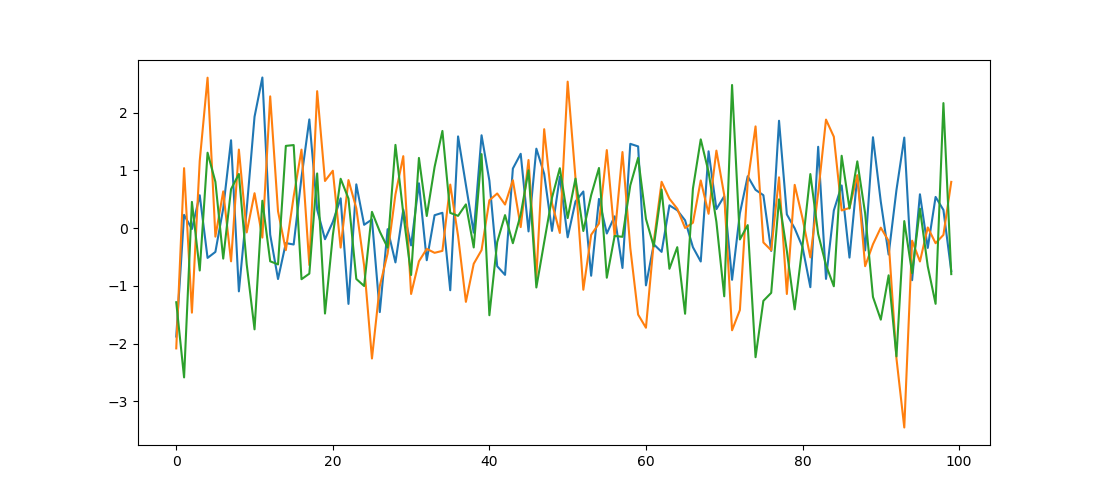

In [51]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib notebook

plt.figure(figsize=(11, 5))
plt.plot(np.random.randn(100))
plt.plot(np.random.randn(100))
plt.plot(np.random.randn(100))
plt.show()

<IPython.core.display.Javascript object>


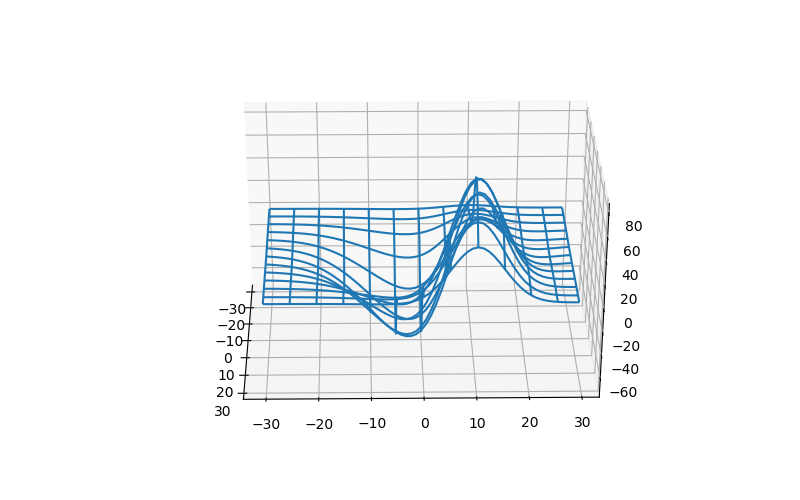

In [69]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

<h2>Interactive Maps with folium</h2>
<p>folium is a python module leveraging leaflet maps in jupyter notebooks</p>
<ul>
    <li><a href="https://python-visualization.github.io/folium/">Folium Documentation</a></li>
    <li><a href="https://leafletjs.com/">Leaflet Documentation</a></li>
</ul>

In [53]:
import os
import folium
from folium import features
from folium.plugins import MarkerCluster

position = (11.4183792, 48.1527277)

def readlines(p):
    with open(p) as f:
        return [(line.strip().split('|')) for line in f.readlines()]

mapp = folium.Map([position[1], position[0]], zoom_start=2)

mc = MarkerCluster()
markerpos = readlines('/home/chy/web/test/geopositions2.csv')
    
mks = [features.Marker([float(i[1]), float(i[2])]) for i in markerpos]

for n in range(len(mks)):
    mc.add_child(mks[n])

mapp.add_child(mc)

mapp.save(os.path.join('mymap.html'))
mapp

<h3>3D Objects with pythreejs</h3>

In [54]:
from pythreejs import *
from IPython.display import display
from math import pi

In [55]:
# Reduce repo churn for examples with embedded state:
from pythreejs._example_helper import use_example_model_ids
use_example_model_ids()

In [56]:
earth = ImageTexture(imageUri='img/earth.jpg')

In [57]:
earth

Preview(child=ImageTexture(imageUri=u'img/earth.jpg', repeat=(1.0, 1.0)), shadowMap=WebGLShadowMap())

<h3>Molecules with nglview</h3>

In [58]:
from ipywidgets import *
import nglview as nv

view = nv.show_structure_file(nv.datafiles.PDB)
view._remote_call("setSize", target="Widget", args=["100%", "600px"])

def licorice(b):
    view.clear_representations()
    view.add_licorice('not hydrogen')

def backbone(b):
    view.clear_representations()
    view.add_backbone()
    view.color_by('atomindex')

def cartoon(b):
    view.clear_representations()
    view.add_cartoon()
    
def spacefill(b):
    view.clear_representations()
    view.add_spacefill('not hydrogen')

def ballandstick(b):
    view.clear_representations()
    view.add_ball_and_stick()

def helixorient(b):
    view.clear_representations()
    view.add_helixorient()
    
reps = ['licorice', 'backbone', 'cartoon', 'spacefill', 'ballandstick', 'helixorient']

btns = [Button(description=rep, on_click=rep) for rep in reps]

btns[0].on_click(licorice)
btns[1].on_click(backbone)
btns[2].on_click(cartoon)
btns[3].on_click(spacefill)
btns[4].on_click(ballandstick)
btns[5].on_click(helixorient)

VBox([view, HBox(btns)])

VkJveChjaGlsZHJlbj0oTkdMV2lkZ2V0KCksIEhCb3goY2hpbGRyZW49KEJ1dHRvbihkZXNjcmlwdGlvbj11J2xpY29yaWNlJywgc3R5bGU9QnV0dG9uU3R5bGUoKSksIEJ1dHRvbihkZXNjcmnigKY=
